## code to calc matching related metric and retreive others (cell level, fosttm, foscknn)

#### plotting was done with abseq citeseq asapseq teaseq together in the other folder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
sys.path.append("./")
import metrics
import utils

In [3]:
out_dir = "/abseq/output/"
ann_listlv1 = []
ann_listlv2 = []
foscttm_list = []
tmp = []
knn_tmp = []
slt_f1 = []
ari_f1 = []

root_dir = out_dir
# produce liger matching
lgx = pd.read_csv(root_dir+"lg/full_embed_x0.csv")
lgy = pd.read_csv(root_dir+"lg/full_embed_y0.csv")
lg_dist = utils.cdist_correlation(lgy.to_numpy(), lgx.to_numpy())
lg_full_match, lg_scores = metrics.get_knn_matching(lg_dist)
lgmatch = [lg_full_match,np.arange(lgy.shape[0]),lg_scores]
# harmony matching
hmx = pd.read_csv(root_dir+"hm/full_embed_x0.csv")
hmy = pd.read_csv(root_dir+"hm/full_embed_y0.csv")
hm_dist = utils.cdist_correlation(hmy.to_numpy(), hmx.to_numpy())
hm_full_match, hm_scores = metrics.get_knn_matching(hm_dist)
hmmatch = [hm_full_match,np.arange(hmy.shape[0]),hm_scores]
# bsc matching
bscx = pd.read_csv(root_dir+"bsc/full_embed_x0.csv")
bscy = pd.read_csv(root_dir+"bsc/full_embed_y0.csv")
bsc_dist = utils.cdist_correlation(bscy.to_numpy(), bscx.to_numpy())
bsc_full_match, bsc_scores = metrics.get_knn_matching(bsc_dist)
bscmatch = [bsc_full_match,np.arange(bscy.shape[0]),bsc_scores]
# load mf matching
mf = pd.read_csv(root_dir+"mf/full_idx.csv")
mfmatch = [mf['idx1'].tolist(),mf['idx2'].tolist(),mf['score'].tolist()]
# load sr matching
#sr = pd.read_csv(root_dir+"sr/full_idx.csv")
#srmatch = [sr['idx1'].tolist(),sr['idx2'].tolist(),sr['score'].tolist()]
srx = pd.read_csv(root_dir+"sr/full_embed_x0.csv")
sry = pd.read_csv(root_dir+"sr/full_embed_y0.csv")
sr_dist = utils.cdist_correlation(sry.to_numpy(), srx.to_numpy())
sr_full_match, sr_scores = metrics.get_knn_matching(sr_dist)
srmatch = [sr_full_match,np.arange(sry.shape[0]),sr_scores]

# load embedding too
# mf embed
mfx = pd.read_csv(root_dir+"mf/full_embed_x0.csv")
mfy = pd.read_csv(root_dir+"mf/full_embed_y0.csv")
# sr embed
srx = pd.read_csv(root_dir+"sr/full_embed_x0.csv")
sry = pd.read_csv(root_dir+"sr/full_embed_y0.csv")
# read meta info
temp_dir = '/home/bkzhu/super_mario/abseq/data_prep/abseqwta_meta.csv'
meta = pd.read_csv(temp_dir)
dropidx = meta.index[meta['hm_annotate'] == 'dirty'].to_list()
meta = meta.drop(dropidx, axis=0)
meta.index = range(meta.shape[0])

fid = pd.read_csv("/home/bkzhu/super_mario/abseq/output/lg/filt_id.csv")
meta2 = meta.drop(index = fid['id']-1, axis=0)

annotationlv1 = meta['hm_annotate'].to_numpy()
annotationlv1_lg = meta2['hm_annotate'].to_numpy()
#annotationlv1_lg = annotationlv1

order = (2,1)
acc_ann_hm = metrics.get_matching_acc(
        matching=hmmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_lg = metrics.get_matching_acc(
        matching=lgmatch, 
        labels1=annotationlv1_lg, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_sr = metrics.get_matching_acc(
        matching=srmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_mf = metrics.get_matching_acc(
        matching=mfmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )

acc_ann_bsc = metrics.get_matching_acc(
        matching=bscmatch, 
        labels1=annotationlv1, 
        labels2=annotationlv1,
        order = order
    )
ann_listlv1.extend([acc_ann_mf, acc_ann_sr, acc_ann_lg, acc_ann_hm, acc_ann_bsc])

In [4]:
ann_listlv1

[0.8580840179817083,
 0.6522244613238257,
 0.48302588745930863,
 0.6261819872887925,
 0.7517439156719888]

In [5]:
foscttm_list = []
tmp = []
knn_tmp = []
slt_f1 = []
ari_f1 = []

# foscttm
# need new dist for lg since fostccm need row aligned
lgx = pd.read_csv(root_dir+"lg/full_embed_x0.csv")
lgy = pd.read_csv(root_dir+"lg/full_embed_y0.csv")
lgy = lgy.drop(index = fid['id']-1, axis=0)
lg_dist = utils.cdist_correlation(lgx.to_numpy(), lgy.to_numpy())
# mf
mfdist = utils.cdist_correlation(mfx.to_numpy(), mfy.to_numpy())
mf_fos = metrics.get_foscttm(mfdist)
# sr
srdist = utils.cdist_correlation(srx.to_numpy(), sry.to_numpy())
sr_fos = metrics.get_foscttm(srdist)
# lg
lg_fos = metrics.get_foscttm(lg_dist)
# hm
hm_fos = metrics.get_foscttm(hm_dist)
# bsc
bsc_fos = metrics.get_foscttm(bsc_dist)

foscttm_list.extend([mf_fos,sr_fos,lg_fos,hm_fos, bsc_fos])

# knn search tmp
k = 100
knn_match_mf = metrics.get_knn_alignment_score(
    dist=mfdist,
    k_max=k
)
knn_match_sr = metrics.get_knn_alignment_score(
    dist=srdist,
    k_max=k
)
knn_match_lg = metrics.get_knn_alignment_score(
    dist=lg_dist,
    k_max=k
)
knn_match_hm = metrics.get_knn_alignment_score(
    dist=hm_dist,
    k_max=k
)
knn_match_bsc = metrics.get_knn_alignment_score(
    dist=bsc_dist,
    k_max=k
)
# store the knn tmp
knn_tmp.extend([knn_match_mf.tolist(), knn_match_sr.tolist(),
                knn_match_lg.tolist(), knn_match_hm.tolist(), knn_match_bsc.tolist()])
# also need to read the integration metrics
mf_met = pd.read_csv(root_dir+"mf/metrics.csv")
sr_met = pd.read_csv(root_dir+"sr/metrics.csv")
lg_met = pd.read_csv(root_dir+"lgunimf/metrics.csv")
hm_met = pd.read_csv(root_dir+"hm/metrics.csv")
bsc_met = pd.read_csv(root_dir+"bsc/metrics.csv")

slt_f1.extend([mf_met.loc[0,'slt_f1'],sr_met.loc[0,'slt_f1'],
               lg_met.loc[0,'slt_f1'],hm_met.loc[0,'slt_f1'], bsc_met.loc[0,'slt_f1']])
ari_f1.extend([mf_met.loc[0,'ari_f1'],sr_met.loc[0,'ari_f1'],
               lg_met.loc[0,'ari_f1'],hm_met.loc[0,'ari_f1'], bsc_met.loc[0,'ari_f1']])

In [6]:
foscttm_list

[0.0493073585906333,
 0.11544684502739742,
 0.19611887468850525,
 0.11860871531671653,
 0.09016448021250593]

In [7]:
# construct batch
#b = np.array(["b1","b2","b3","b4","b5"])
#binfo = np.repeat(b, [4,4,4,4,4], axis=0)
m = ["mf","sr","lg","hm","bsc"]
minfo = m

data = {'method':minfo,'slt_f1': slt_f1, 'ari_f1':ari_f1,
       'ann1':ann_listlv1, 'foscttm':foscttm_list, 'tmp':tmp }

matching_result = pd.DataFrame(data)

In [8]:
matching_result

,method,slt_f1,ari_f1,ann1,foscttm,tmp
0,mf,0.554856,0.624079,0.858084,0.049307,0.003566
1,sr,0.507013,0.588088,0.652224,0.115447,0.001848
2,lg,0.442060,0.518151,0.483026,0.196119,0.000461
3,hm,0.508608,0.590754,0.626182,0.118609,0.001748
4,bsc,0.537106,0.610262,0.751744,0.090164,0.002677


In [9]:
matching_result.to_csv("/abseq/output/metrics_result.csv")

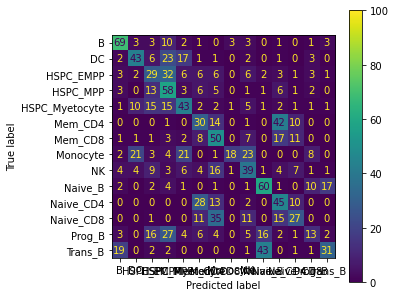

In [11]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[lgmatch[1]], annotationlv1_lg[lgmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/abseq_lg.svg')

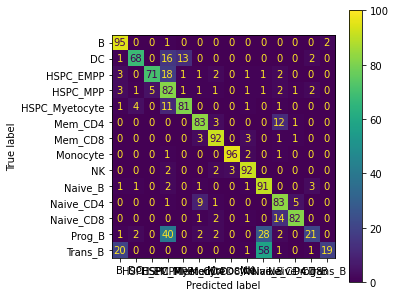

In [12]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[mfmatch[1]], annotationlv1[mfmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/abseq_mf.svg')

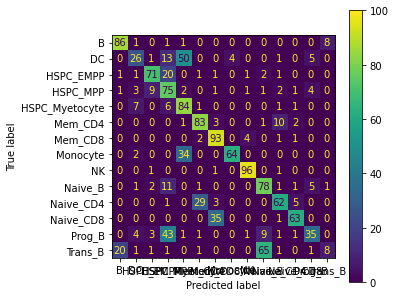

In [13]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[bscmatch[1]], annotationlv1[bscmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/abseq_bsc.svg')

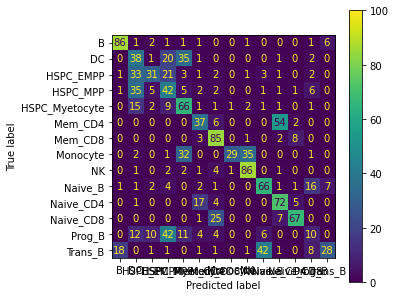

In [14]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[hmmatch[1]], annotationlv1[hmmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/abseq_hm.svg')

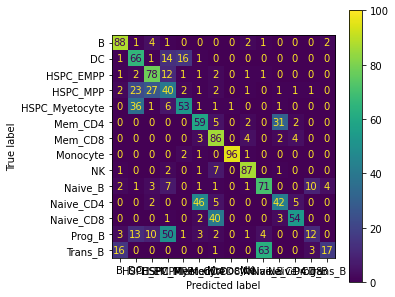

In [15]:
plt.rcParams["figure.figsize"] = (5,5)
cm = confusion_matrix(annotationlv1[srmatch[1]], annotationlv1[srmatch[0]])
disp = ConfusionMatrixDisplay(
    confusion_matrix=np.round((cm.T/np.sum(cm, axis=1)).T*100), 
    display_labels=np.unique(annotationlv1)
)
disp.plot()
disp.ax_.get_images()[0].set_clim(0, 100)
plt.savefig('/fig3_ploting/plots/abseq_sr.svg')

In [11]:
# construct batch
#b = np.array(["b1","b2","b3","b4","b5"])
#binfo = np.repeat(b,[400,400,400,400,400], axis=0).tolist()
m = np.array(["mf", "sr","lg","hm","bsc"])
minfo = np.repeat(m, [100,100,100,100,100], axis=0).tolist()
minfo2 = minfo #* 5
knn = [item for sublist in knn_tmp for item in sublist]
step = [i for i in range(100)]*5 #*5
data = {'method':minfo2,'knn_tmp': knn, 'step':step }

knn_result = pd.DataFrame(data)

In [13]:
# save the results as csvs
knn_result.to_csv("/home/bkzhu/super_mario/abseq/output/knntmpV2.csv")

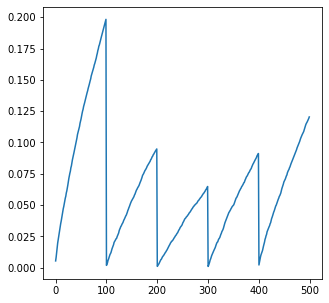

In [14]:
plt.plot(knn)